1. "tidyverse", "data.table" 패키지를 부착하고 출력 그래프의 크기를 원하는 크기로 알맞게 설
정하세요.

In [3]:
install.packages(c("tidyverse", "data.table"))

library(tidyverse)
library(data.table)

library(repr)
options(repr.plot.width = 30, repr.plot.height = 15)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




2. https://www.kaggle.com/c/titanic/data 제시된 titanic_train.csv 파일을 다운로드 받아 자신의
코랩에 저장한 후 DF에 tibble 형태로 읽어 들여 확인하세요. (Hint) system(), fread()

In [4]:
#https://drive.google.com/file/d/14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l/view?usp=share_link

system("gdown --id 14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l")
system("ls", TRUE)

[1] "sample_data"       "titanic_train.csv"

In [5]:
DF <- fread("/content/titanic_train.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

3. 위 문제의 변수설명을 참고로 DF에서 팩터 형태로 저장되어야 하는 데이터들을 팩터로 변경
하고 분석에 영향을 미치지 않는 변수들은 제외하여 DF에 저장하세요. (Hint) 팩터
("Survived", "Pclass", "Sex", "Embarked"), 분석에 영향을 미치지 않으므로 제외
(-PassengerId, -Name, -Cabin, -Ticket)

In [6]:
DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

In [7]:
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0  8.05 S       
 6 0        3      male      NA     0     0  8.46 Q       
 7 0        1      male      54     0     0 51.9  S       
 8 0        3      male       2     3     1 21.1  S       
 9 1        3      female    27     0     2 11.1  S       
10 1        2      female    14     1     0 30.1  C       
# ℹ 881 more rows


In [8]:
DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


4. DF %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망
자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA를 어떻게 처리할지는 분
석자의 몫입니다. 이번 분석에서는 NA를 중간값으로 변경하세요. (Hint) Hmisc::impute()

In [9]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [10]:
summary(DF)

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [11]:
#DF <- DF %>% na.omit()
DF$Age <- impute(DF$Age, median)
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


5. DF 데이터의 90%를 학습 데이터(train)로, 나머지는 테스트 데이터(test)로 분리하세요. (Hint) caret::createDataPartition() 또는 sample_frac(), setdiff()

In [12]:
install.packages("caret")
library(caret)
set.seed(31)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [13]:
index <- caret::createDataPartition(y = DF$Survived, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1        2      male   34.0         0     0 13    S       
 2 0        3

6. train 데이터와 rpart()을 이용하여 DecisionTree 모델 model_dt을 생성하고 확인하세요. Variable importance를 확인하여 Survived에 가장 큰 영향을 미치는 인자가 무엇인지도 확인
하세요.

In [14]:
install.packages("rpart")
library(rpart)

model_dt <- rpart(formula = Survived ~ ., data = train, method = "class")
summary(model_dt)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = Survived ~ ., data = train, method = "class")
  n= 803 

          CP nsplit rel error    xerror       xstd
1 0.46103896      0 1.0000000 1.0000000 0.04473727
2 0.03084416      1 0.5389610 0.5389610 0.03725763
3 0.01623377      3 0.4772727 0.4837662 0.03576626
4 0.01461039      4 0.4610390 0.5000000 0.03622215
5 0.01000000      6 0.4318182 0.4805195 0.03567328

Variable importance
     Sex     Fare   Pclass      Age    Parch    SibSp Embarked 
      45       18       13       10        7        4        3 

Node number 1: 803 observations,    complexity param=0.461039
  predicted class=0  expected loss=0.3835616  P(node) =1
    class counts:   495   308
   probabilities: 0.616 0.384 
  left son=2 (515 obs) right son=3 (288 obs)
  Primary splits:
      Sex      splits as  RL,           improve=118.321300, (0 missing)
      Pclass   splits as  RRL,          improve= 44.556040, (0 missing)
      Fare     < 52.2771  to the left,  improve= 36.415030, (0 missing)
      

7.  모델 model_dt를 plot()을 이용하여 DecisionTree로 그리세요.

In [16]:
install.packages(c("rattle", "rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



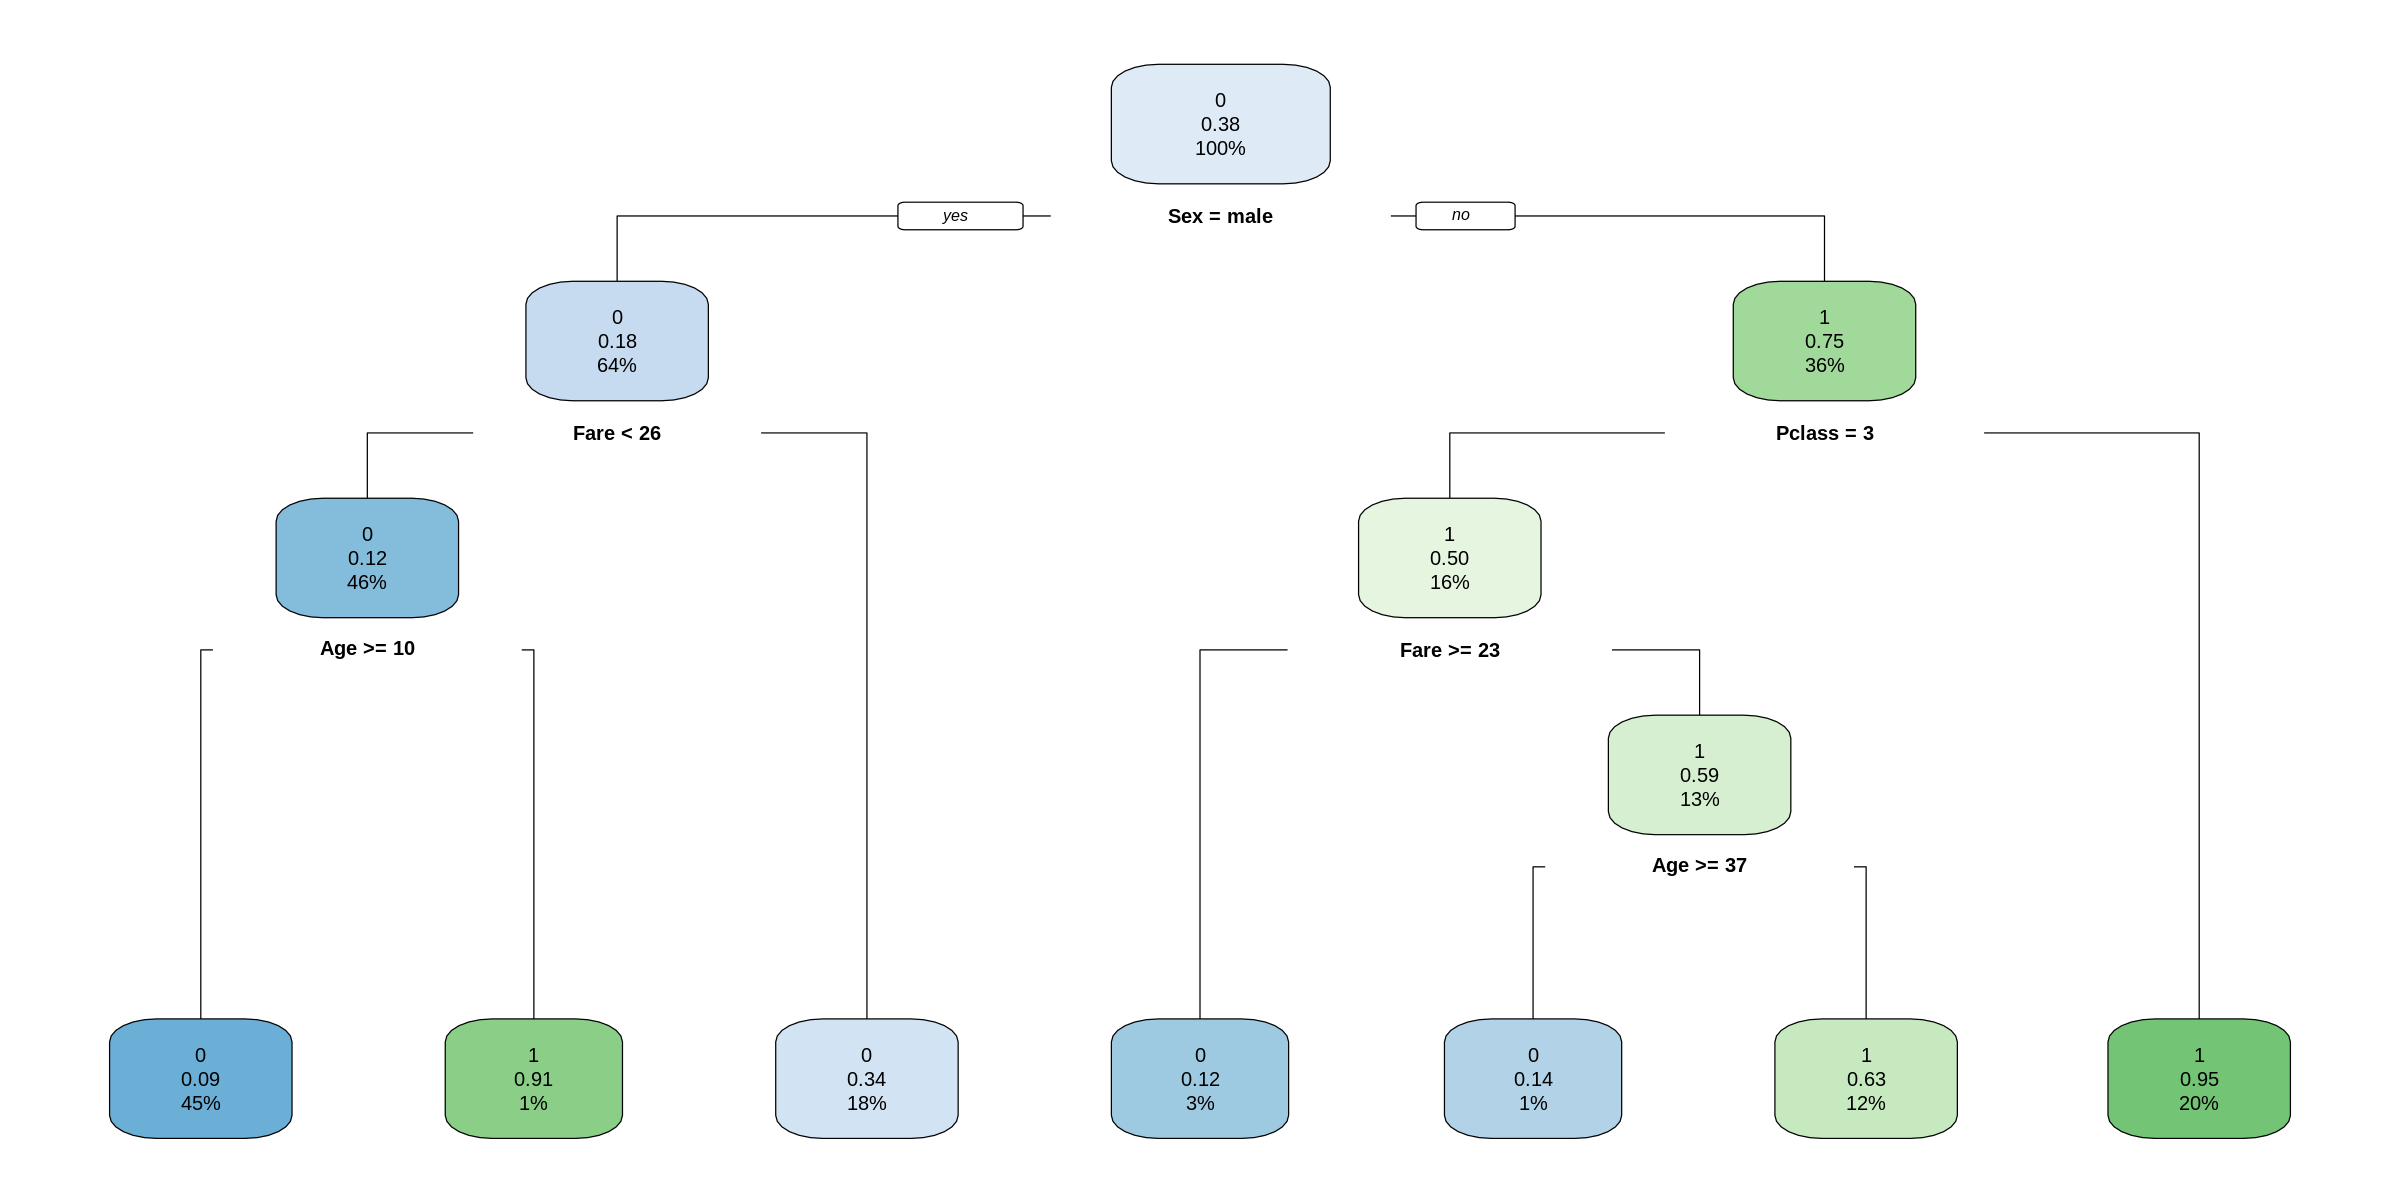

In [17]:
options(repr.plot.width = 20, repr.plot.height = 10)
rpart.plot(model_dt)

8. 모델 model_dt를 rpart.plot() 또는 fancyRpartPlot()을 이용하여 DecisionTree로 그린 후 생존한 데이터의 특징을 분석하세요.

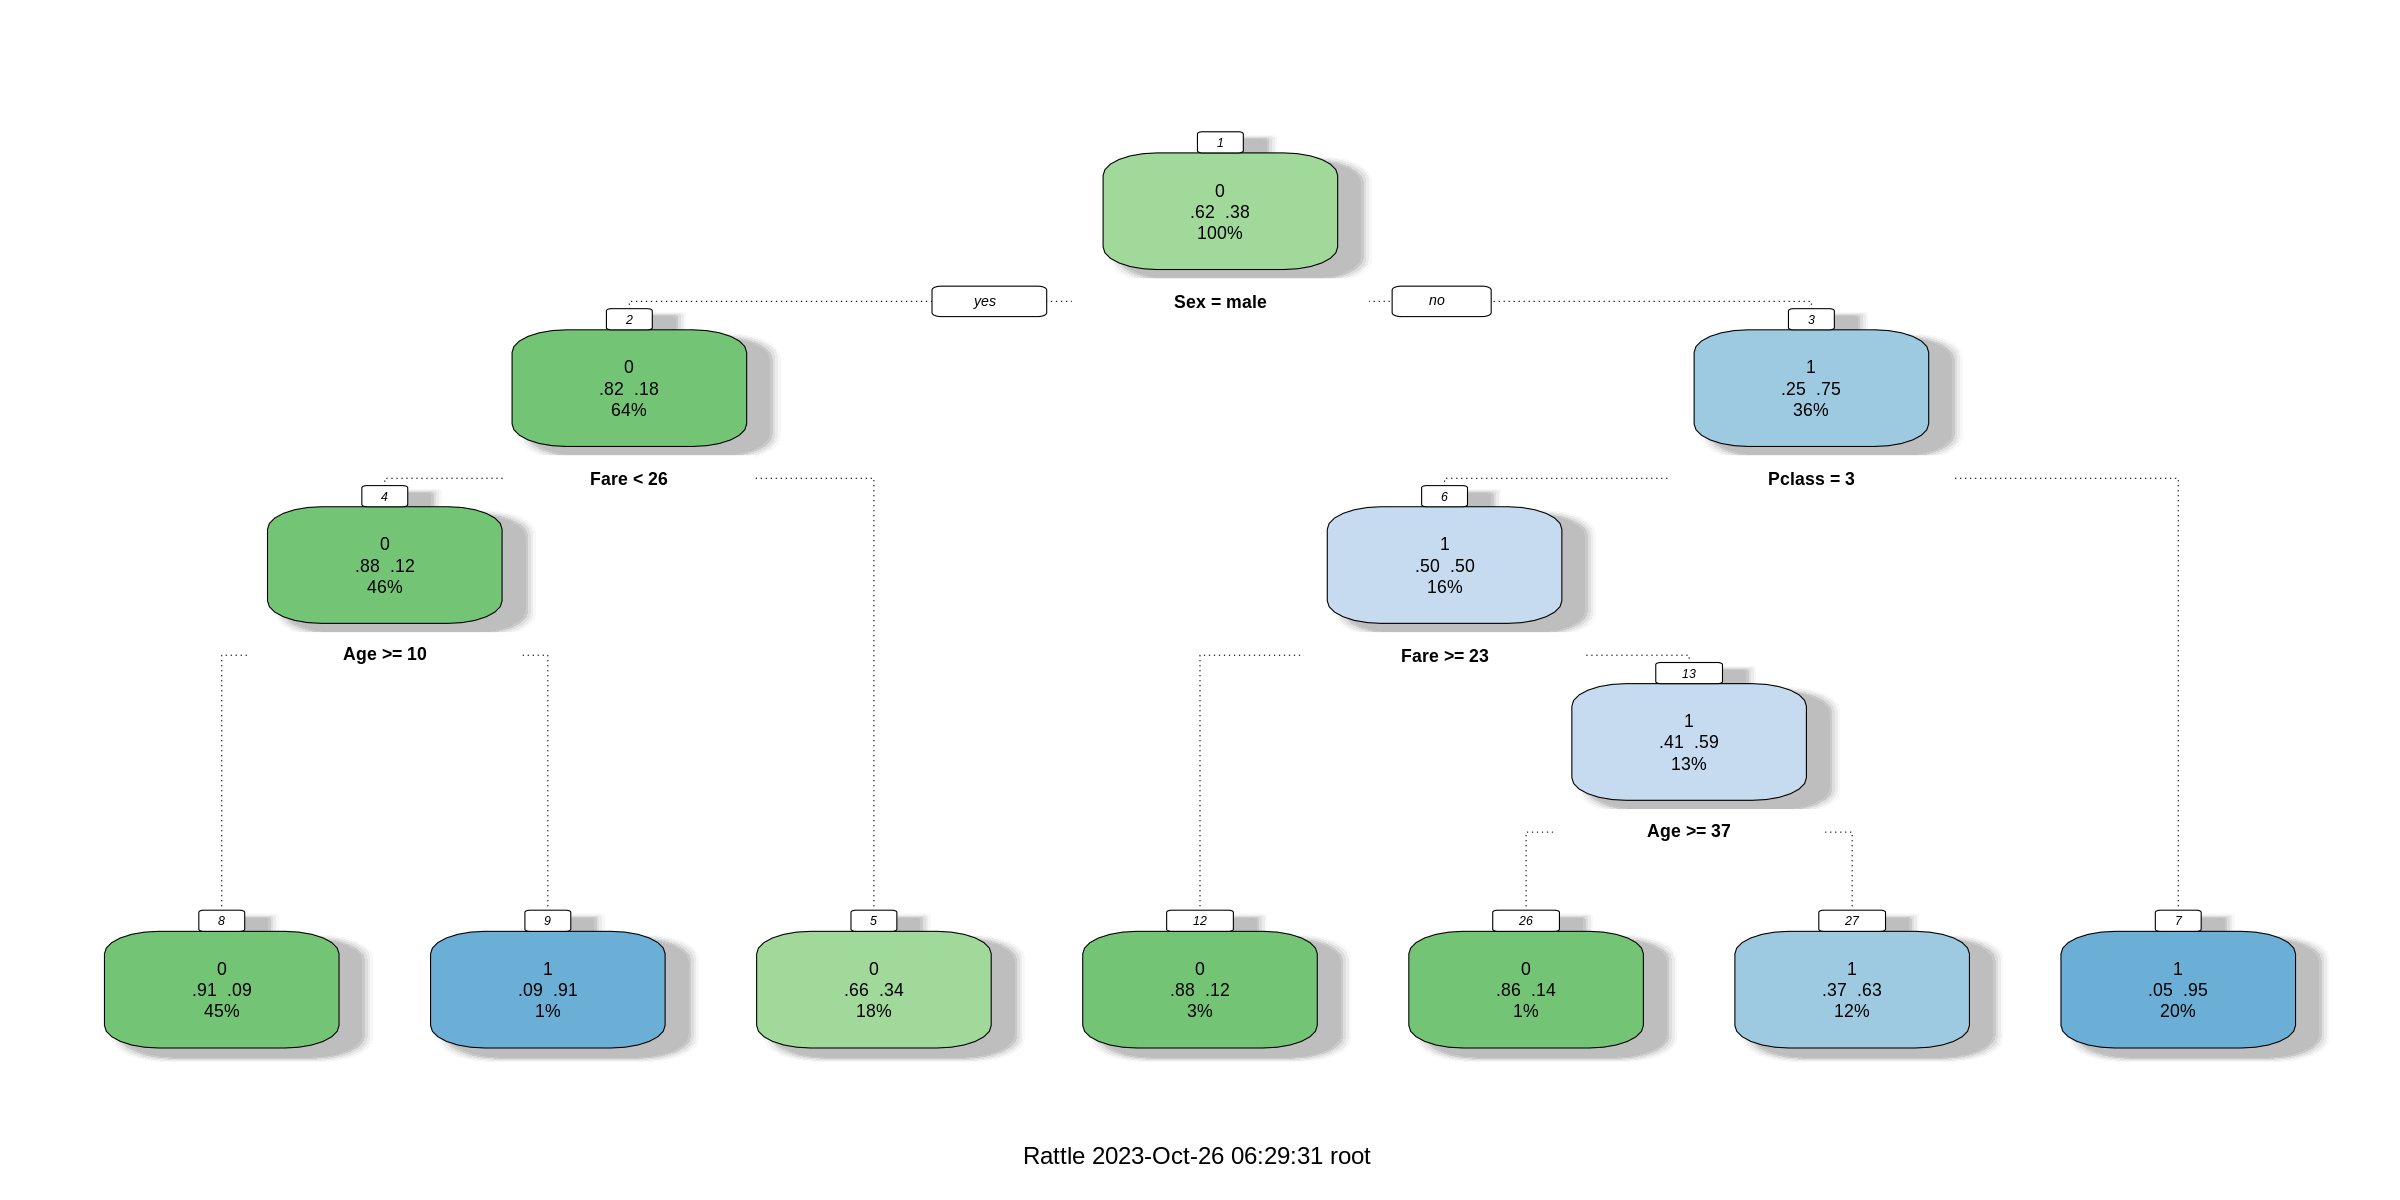

In [18]:
fancyRpartPlot(model_dt)

9. 과잉적합에 빠지지 않도록 모델 model_dt에 가지치기(pruning)를 하려고 합니다. xerror(cross validation error)가 최소가 되는 CP를 min_xerror_cp에 저장하세요. (Hint) model_dt$cptable

In [19]:
min_xerror_cp <- model_dt$cptable %>% as_tibble() %>% filter(xerror == min(xerror))  %>% pull(CP)
print("min_xerror_cp = ")
min_xerror_cp

[1] "min_xerror_cp = "


[1] 0.01

10. 위에서 구한 min_xerror_cp 값을 이용하여 모델 model_dt에 가지치기(pruning)를 수행한 모델을 model_pr에 저장하세요. 이후 fancyRpartPlot()을 model_dt와 model_pr을 비교하세요. (Hint) rpart::prune()

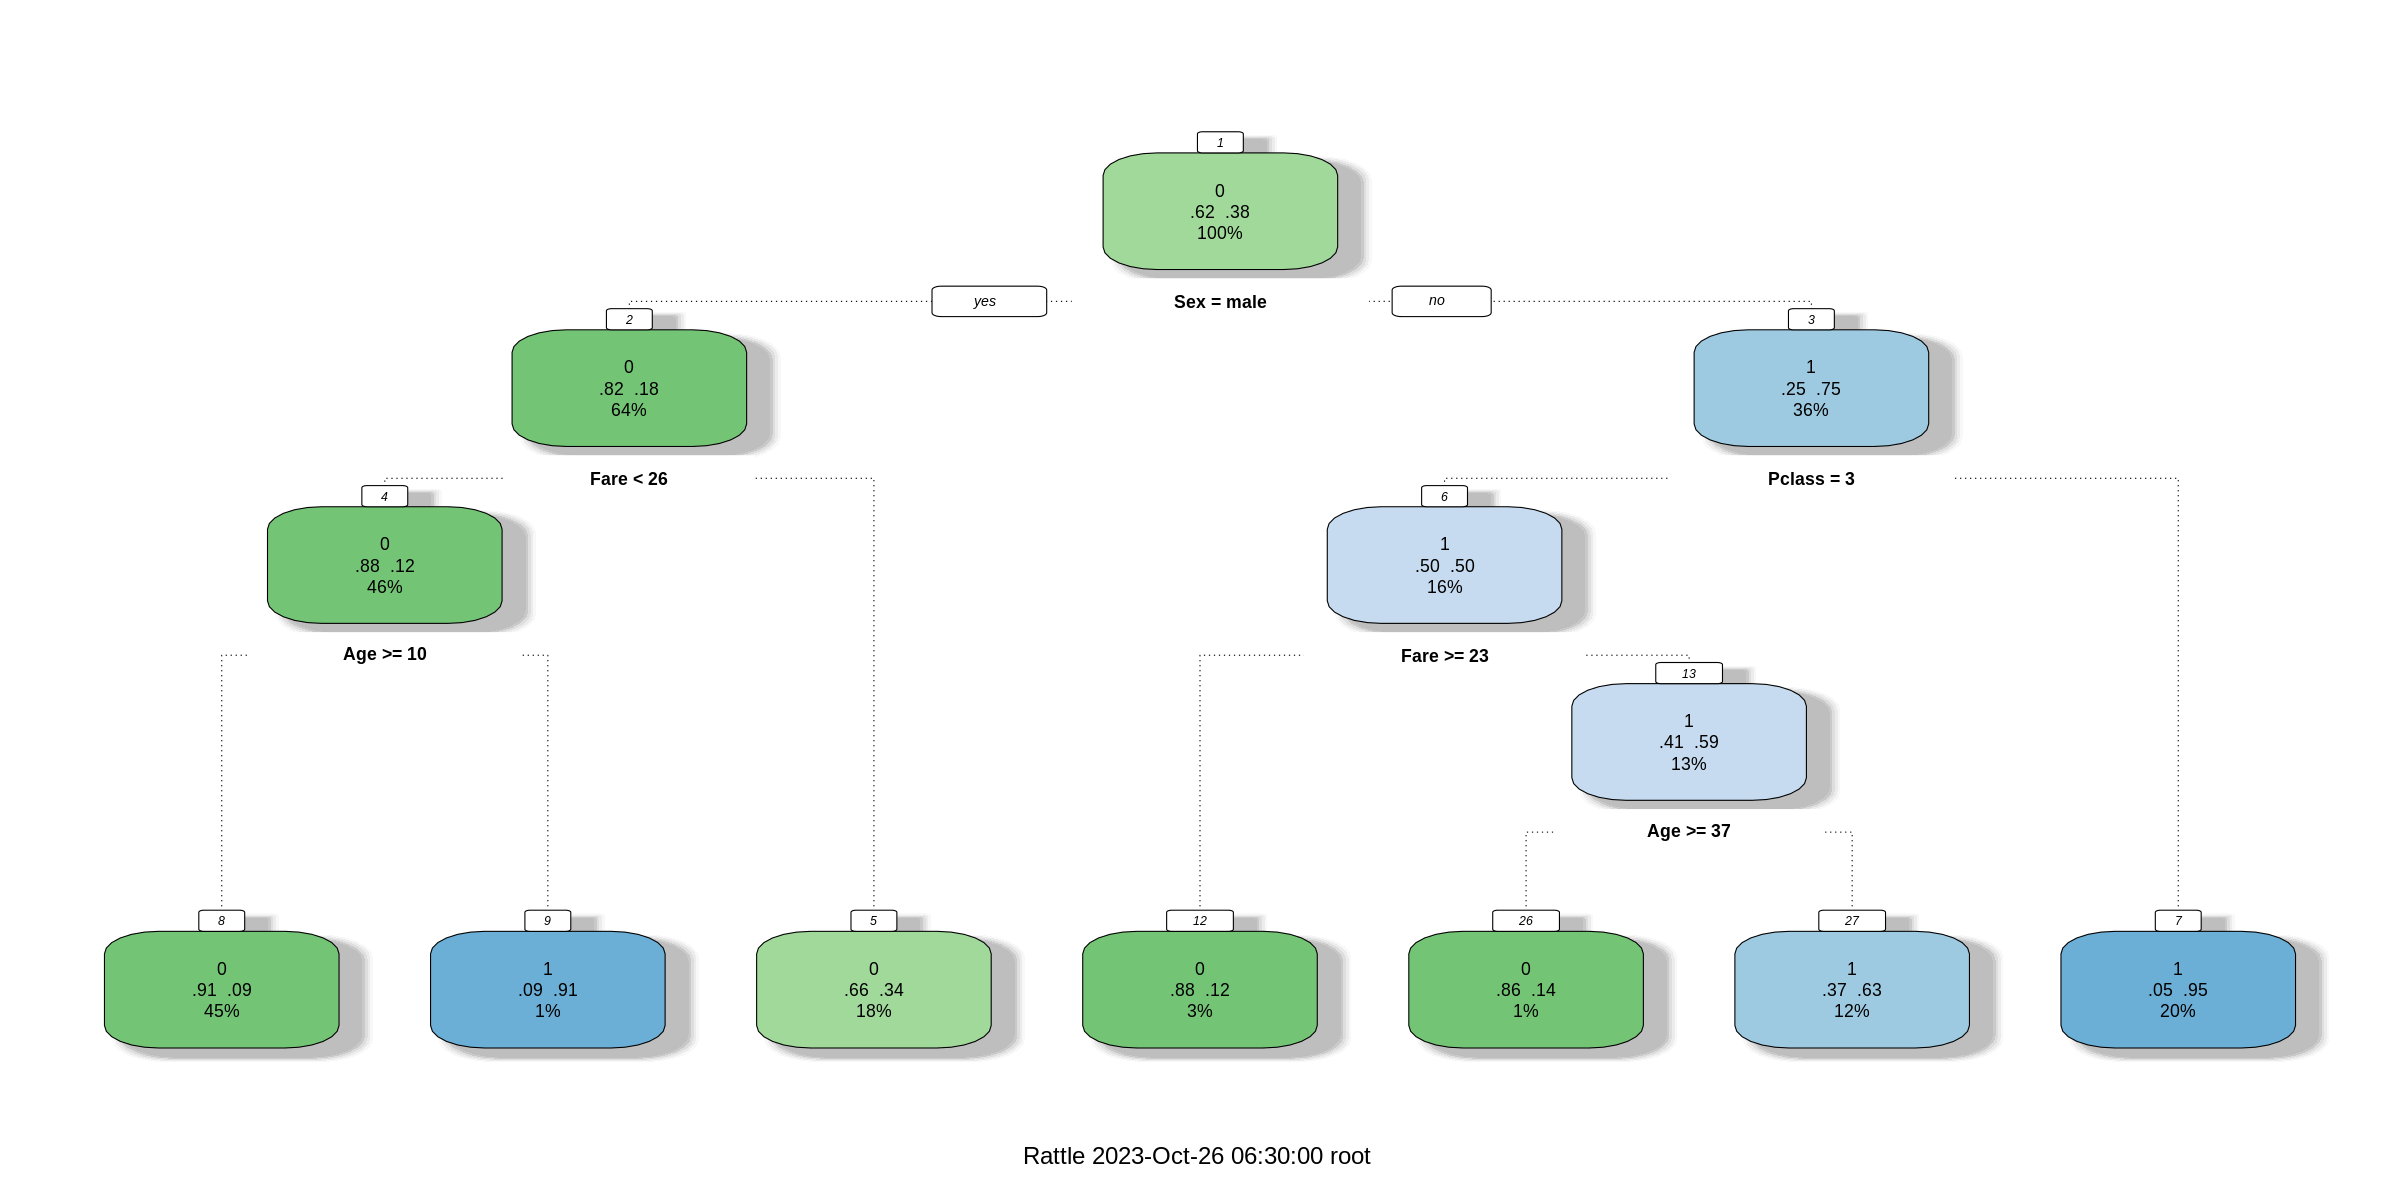

In [20]:
model_pr <- rpart::prune(model_dt, cp = min_xerror_cp)
fancyRpartPlot(model_dt)
fancyRpartPlot(model_pr)

11. 모델 model_pr을 사용하여 test 데이터로 예측을 수행한 후 예측값을 predict_value에 저장하고 확인하세요. (Hint) predict()

In [21]:
predict_value <- predict(model_pr, test, type = "class") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 88 × 1
   predict_value
   <fct>        
 1 0            
 2 0            
 3 0            
 4 0            
 5 0            
 6 0            
 7 0            
 8 1            
 9 0            
10 0            
# ℹ 78 more rows


12. 위 문제에서 구한 predict_value와 test 데이터의 Survived 데이터를 묶어 predict_check에 저장하고 확인하세요. (Hint) select(), bind_cols()

In [22]:
predict_check <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value)
predict_check %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>    <fct>        
 1 1        0            
 2 0        0            
 3 0        0            
 4 0        0            
 5 1        0            
 6 0        0            
 7 1        0            
 8 0        1            
 9 0        0            
10 0        0            
# ℹ 78 more rows


13. test 데이터로 예측을 수행하여 예측값을 저장한 predict_value와 test$Survived 사이의 confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요. 또한 지난 시간에 구한 로지스틱회귀의 결과와도 비교하세요. Titanic 데이터의 경우 두 모델 중 어느 모델을 사용하는 것이 좋을까요? (Hint) caret::confusionMatrix()

In [23]:
cm <- caret::confusionMatrix(predict_check$predict_value, test$Survived)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48 14
         1  6 20
                                          
               Accuracy : 0.7727          
                 95% CI : (0.6711, 0.8553)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.00114         
                                          
                  Kappa : 0.4989          
                                          
 Mcnemar's Test P-Value : 0.11752         
                                          
            Sensitivity : 0.8889          
            Specificity : 0.5882          
         Pos Pred Value : 0.7742          
         Neg Pred Value : 0.7692          
             Prevalence : 0.6136          
         Detection Rate : 0.5455          
   Detection Prevalence : 0.7045          
      Balanced Accuracy : 0.7386          
                                          
       'Positive' Class : 0               
                                    